In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# パラメータを指定

In [2]:
VoxelSize = 250  # ボクセルの大きさ
colRange = 256     # RGBカラーのレンジ　256だと1677万色、8だと512色
inputFile = 'pts_test3.pts'        # 読み込むptsのパス
outputFile = 'pts_outColFull.csv'  # アウトプットするcsvのパス

# ptsデータを読み込む
スペース区切り　ヘッダー無し　１行目をスキップする

コラムに名前を付ける

In [3]:
data = pd.read_csv(inputFile,  delim_whitespace=True, header=None, skiprows=1)
data.rename(columns={0:"X", 1:"Y", 2:"Z", 3:"S", 4:"R", 5:"G", 6:"B"}, inplace=True)
data.head()

,X,Y,Z,S,R,G,B
0,143197.33150,68236.90364,17692.48538,1582,239,238,252
1,142045.33736,69826.88802,17897.88674,1630,254,254,254
2,143461.08150,68003.04427,17404.67092,1598,236,235,253
3,142682.73970,68818.18489,18043.67483,1678,250,249,254
4,138158.53267,67316.71810,16203.82815,1196,255,255,255


In [4]:
data.dtypes

X    float64
Y    float64
Z    float64
S      int64
R      int64
G      int64
B      int64
dtype: object

In [5]:
len(data)

5384086

# ptsデータを加工する
ボクセルサイズに合わせてXYZ座標をラウンド

RGBを0～255から0～1に変換

XYZ座標からGroupIDを作成

In [6]:
data.X //= VoxelSize
data.Y //= VoxelSize
data.Z //= VoxelSize

data.R = round(data.R/255*colRange)/colRange
data.G = round(data.G/255*colRange)/colRange
data.B = round(data.B/255*colRange)/colRange

data["VoxelID"] = 0
data.VoxelID = (data['X'].astype(str)+data['Y'].astype(str)+data['Z'].astype(str))
data.sort_values(['X','Y','Z'], inplace=True)

data.X *= VoxelSize
data.Y *= VoxelSize
data.Z *= VoxelSize

data.head()

,X,Y,Z,S,R,G,B,VoxelID
5112019,41000.0,54750.0,250.0,-184,1.000000,1.000000,1.000000,164.0219.01.0
5120193,41000.0,55000.0,250.0,586,0.996094,0.996094,0.996094,164.0220.01.0
5120375,41000.0,55250.0,250.0,-168,1.000000,1.000000,1.000000,164.0221.01.0
5112041,41000.0,55500.0,250.0,458,1.000000,1.000000,1.000000,164.0222.01.0
5112086,41000.0,55500.0,250.0,217,1.000000,1.000000,1.000000,164.0222.01.0


# VoxelIDでグループ化

In [7]:
grouped = data.groupby('VoxelID')
len(grouped)

684130

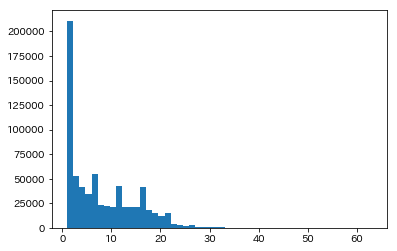

In [8]:
count = grouped.size()
plt.hist(count, bins=50)
plt.show()

In [9]:
df_out = grouped.min()
df_out.S = count
df_out.head()

,X,Y,Z,S,R,G,B
VoxelID,,,,,,,
164.0219.01.0,41000.0,54750.0,250.0,1,1.000000,1.000000,1.000000
164.0220.01.0,41000.0,55000.0,250.0,1,0.996094,0.996094,0.996094
164.0221.01.0,41000.0,55250.0,250.0,1,1.000000,1.000000,1.000000
164.0222.01.0,41000.0,55500.0,250.0,2,1.000000,1.000000,1.000000
164.0232.01.0,41000.0,58000.0,250.0,1,0.859375,0.878906,0.863281


# csvデータをエクスポート

In [10]:
df_out.to_csv(outputFile, index=False, header=False)